## Load the Data

In [32]:
import pandas as pd

file_path = 'loan.csv'
df = pd.read_csv(file_path, low_memory=False) #To avoid the warning but may not solve the underlying issue of mixed data types.
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 1.Understand the Data

In [67]:
## Display the first few rows
print(df.head())

## Display the data types of each column
print(df.dtypes)

## Get summary statistics
print(df.describe())

   loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length  ... total_rec_int  \
0     B        B2                       NaN  10+ years  ...        863.16   
1     C        C4                     Ryder   < 1 year  ...        435.17   
2     C        C5                       NaN  10+ years  ...        605.67   
3     C        C1       AIR RESOURCES BOARD  10+ years  ...       2214.92   
4     B        B5  University Medical Group     1 year  ...       1037.39   

   total_rec_late_fee recoveries collection_recovery_fee

In [ ]:
# Points from Data Dictionary - consider below columns
# verification_status - annual income - Verified > source verified > not verified
# Grade and Sub Grade - A > B > C > D and 1 > 2 > 3 > 4
# Home Ownership - Own > mortgage > rent > others
# loan status - fully paid > current > charged off
# dti - debt to income ration - it should be low and value ranges from 0 - 100% - 0 or low
# delinq_2yrs - 0 or low
# inq_last_6mths - credit score inquiries - 0 or low
# mths_since_last_delinq - NA or high
# mths_since_last_record - NA or high
# open_acc - NA or low
# pub_rec - NA or low
# revol_bal - 0 or less
# revol_util - 0 or less
# total_acc - it should be high
# total_rec_late_fee - 0 or low
# recoveries - 0 or low
# collection_recovery_fee - 0 or low
# application_type 
# dti_joint 
# verification_status_joint
# acc_now_delinq
# pub_rec_bankruptcies
# tax_liens

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34045 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   34045 non-null  int64  
 1   funded_amnt                 34045 non-null  int64  
 2   funded_amnt_inv             34045 non-null  float64
 3   term                        34045 non-null  object 
 4   int_rate                    34045 non-null  object 
 5   installment                 34045 non-null  float64
 6   grade                       34045 non-null  object 
 7   sub_grade                   34045 non-null  object 
 8   emp_title                   31977 non-null  object 
 9   emp_length                  33074 non-null  object 
 10  home_ownership              34045 non-null  object 
 11  annual_inc                  34045 non-null  float64
 12  verification_status         34045 non-null  object 
 13  issue_d                     34045 no

# 2. Data clean up and manipulation

In [34]:
# Columns to drop by name
columns_to_drop_by_name = ['id', 'member_id', 'url', 'desc','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','zip_code','title','pymnt_plan','addr_state','next_pymnt_d','initial_list_status','last_credit_pull_d']

# Drop the columns
df.drop(columns=columns_to_drop_by_name, inplace=True)

## Check for columns with mixed types

In [35]:

mixed_type_columns = df.select_dtypes(include=['object']).columns

for col in mixed_type_columns:
    print(f"Column: {col}")
    print(df[col].unique())

Column: term
[' 36 months' ' 60 months']
Column: int_rate
['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.59%' '24.40%' '21.48%' '14.82%'
 '14.17%' '7.29%' '17.88%' '20.11%' '16.02%' '17.51%' '13.43%' '14.91%'
 '13.06%' 

## Convert Columns to Consistent Types


In [36]:
# cleaning employee length column 
# Define mapping
emp_length_map = {
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
    # Add more mappings as needed
}

# Map emp_length to numeric values
df['emp_length_numeric'] = df['emp_length'].map(emp_length_map)


In [37]:
#Converting  int_rate to numeric
df['int_rate_numeric'] = df['int_rate'].str.rstrip('%').astype('float')

## Identify and remove Outliers 

In [38]:
import numpy as np

# Define a function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to relevant columns
for column in ['loan_amnt', 'annual_inc', 'dti', 'revol_bal', 'total_acc']:
    df = remove_outliers(df, column)

# 3. Data Analysis

## Analyzing Patterns of Loan Defaulters

In [39]:

# Define a column indicating default status
df['default'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)'] else 0)

# Analyze default rates by loan grade
default_rate_by_grade = df.groupby('grade')['default'].mean()
print(default_rate_by_grade)

# Analyze default rates by employment length
default_rate_by_emp_length = df.groupby('emp_length')['default'].mean()
print(default_rate_by_emp_length)


grade
A    0.060579
B    0.121300
C    0.169410
D    0.214034
E    0.252979
F    0.302168
G    0.366197
Name: default, dtype: float64
emp_length
1 year       0.142116
10+ years    0.152088
2 years      0.130158
3 years      0.136276
4 years      0.132082
5 years      0.139333
6 years      0.139752
7 years      0.138582
8 years      0.135069
9 years      0.129735
< 1 year     0.137998
Name: default, dtype: float64


##  Keep only 'Charged Off' loan rows

In [42]:

df_defaulters = df[df['loan_status'] == 'Charged Off']

df_defaulters.head()
# Get the number of rows and columns
rows, columns = df_defaulters.shape

# Print the total number of rows
print(f'Total number of rows: {rows}')

Total number of rows: 4822


## Perform univariate analysis on key numerical and categorical columns

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


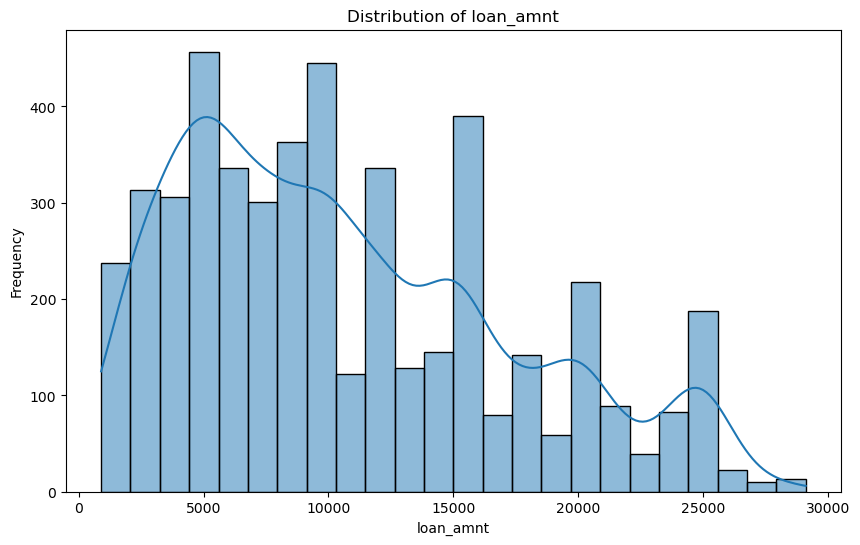

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


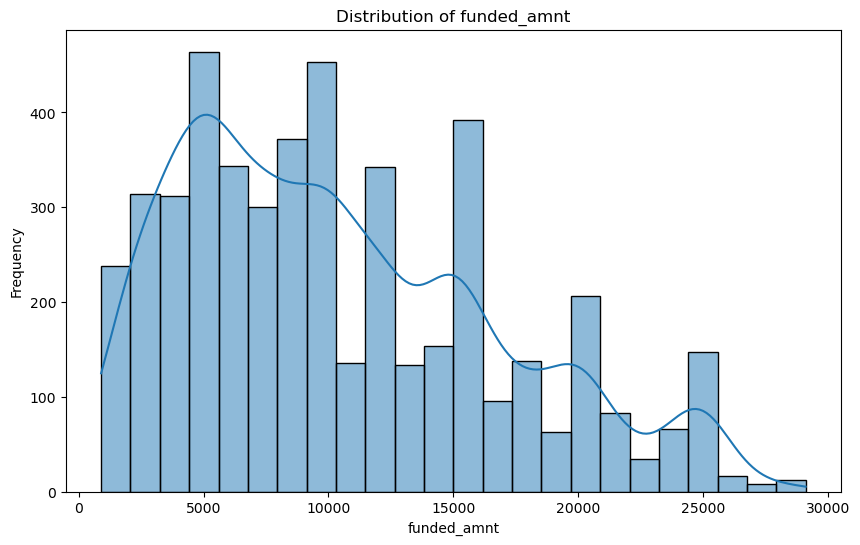

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


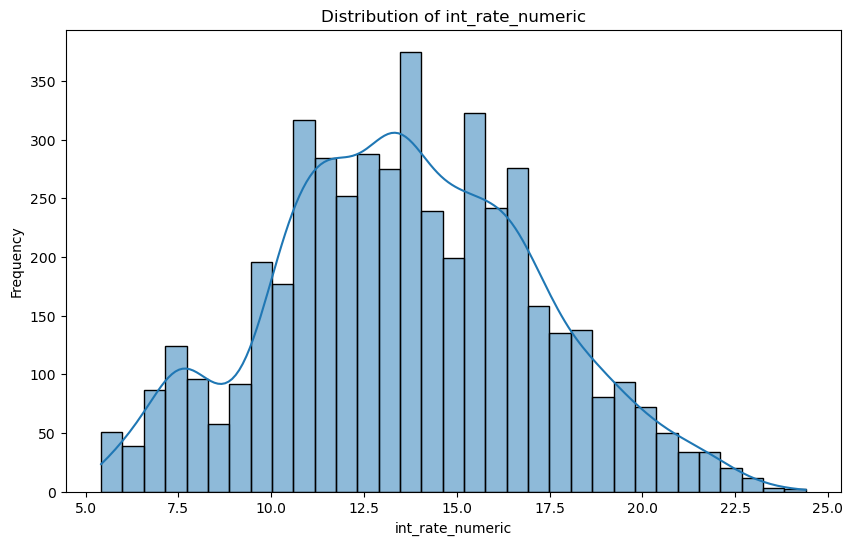

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


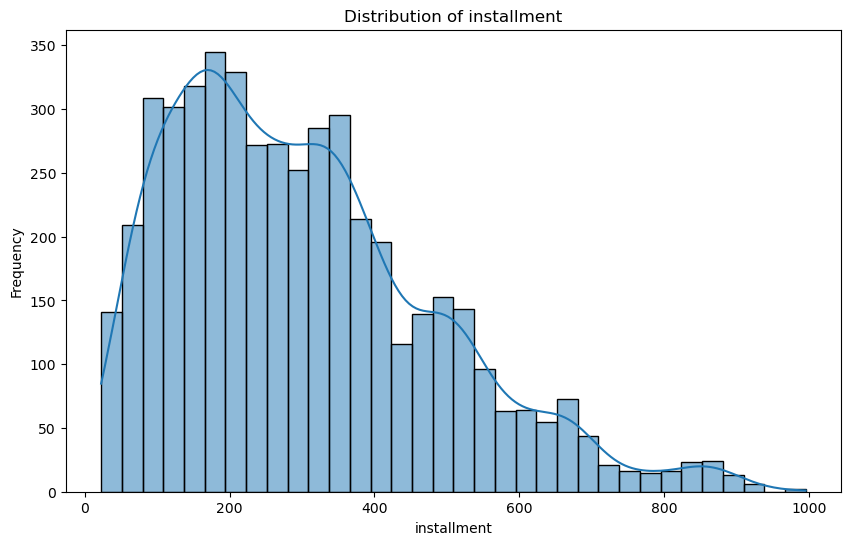

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


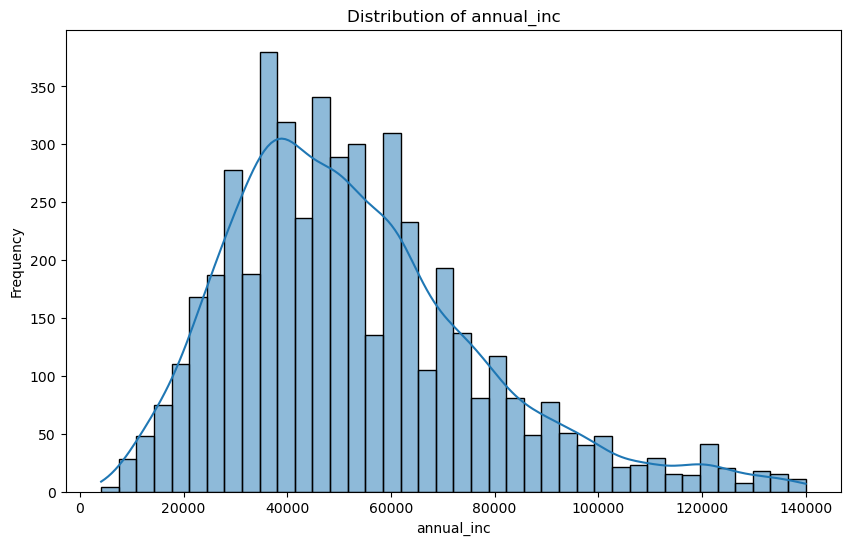

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


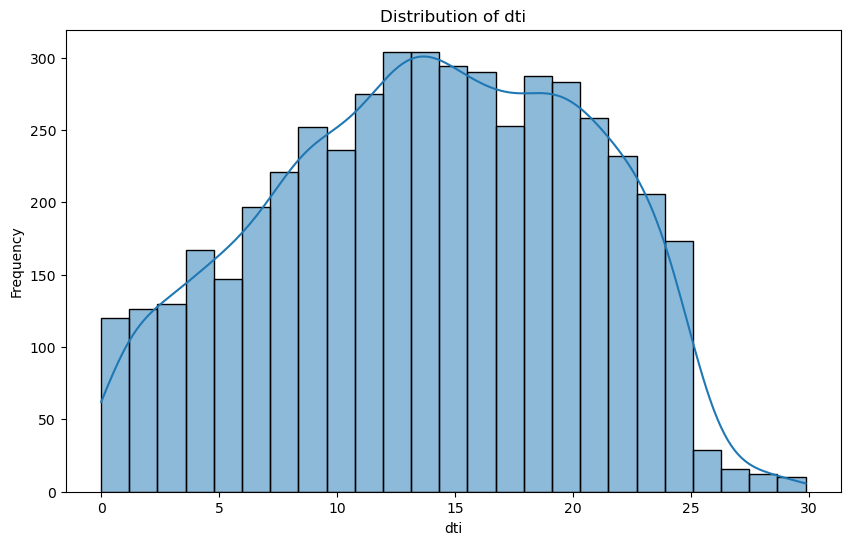

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


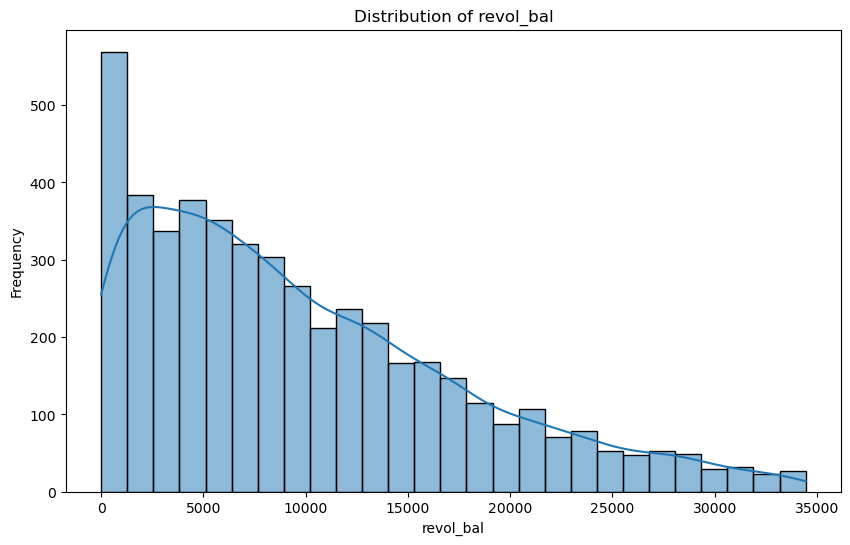

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


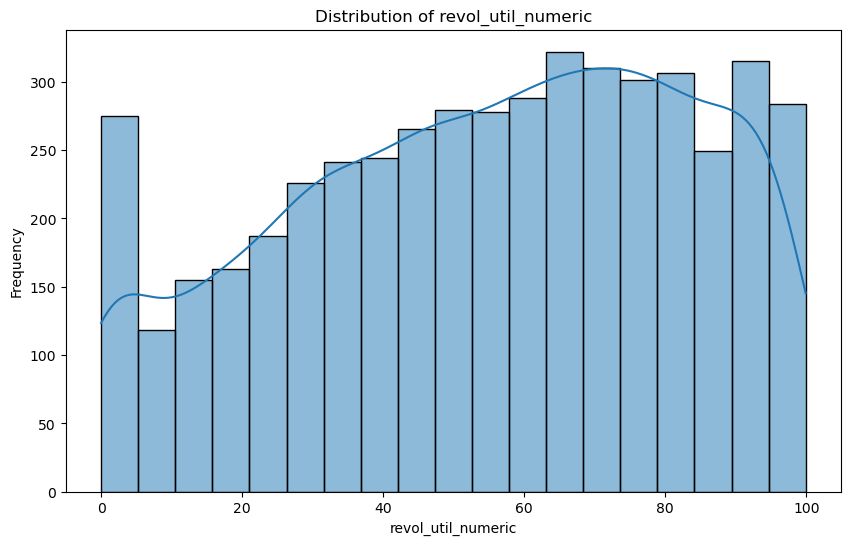

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


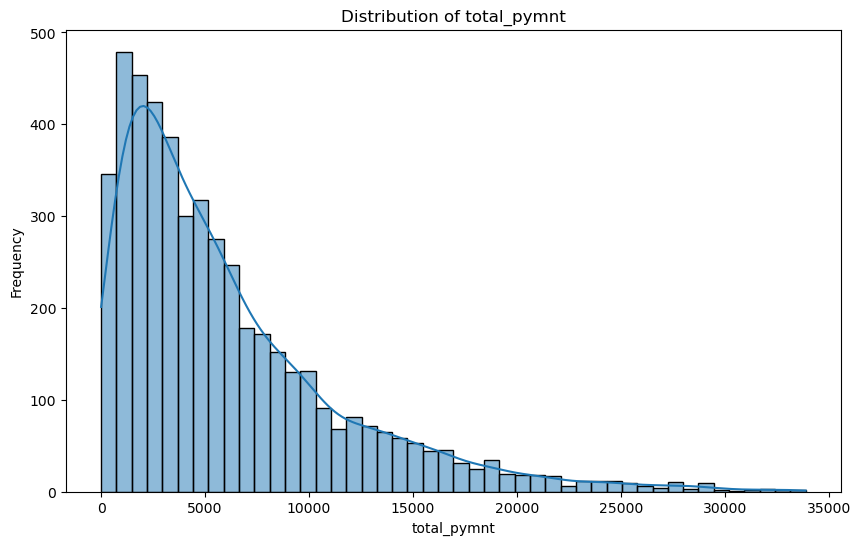

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


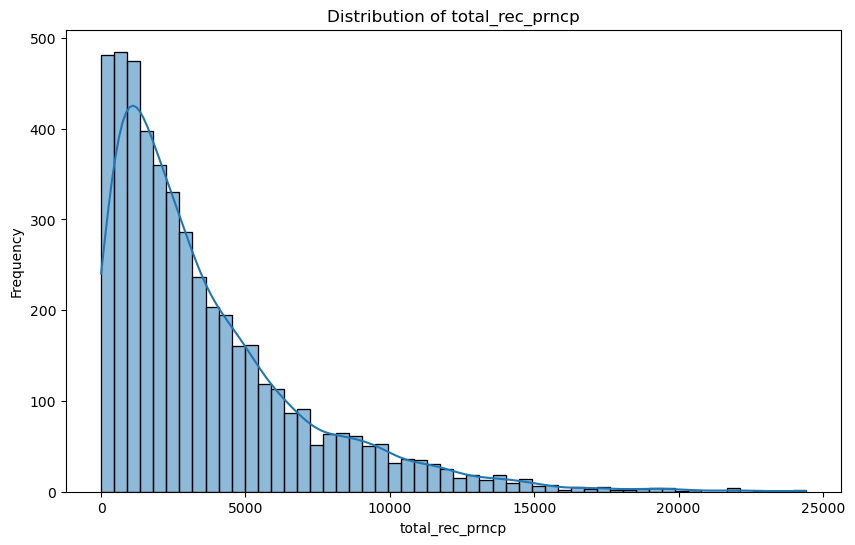

C:\Users\homer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


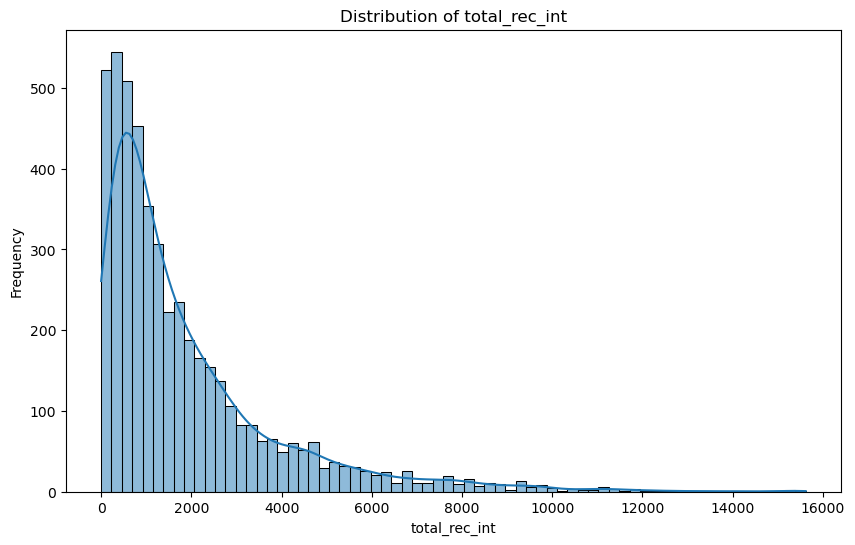

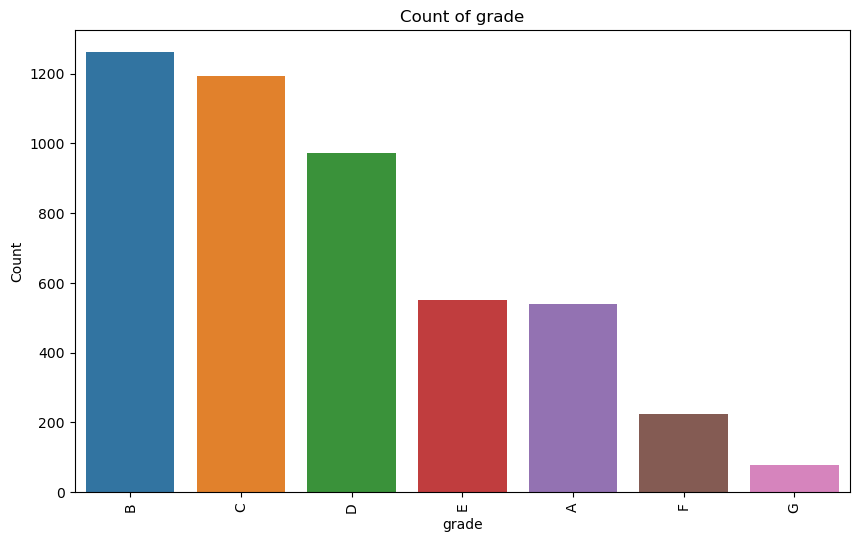

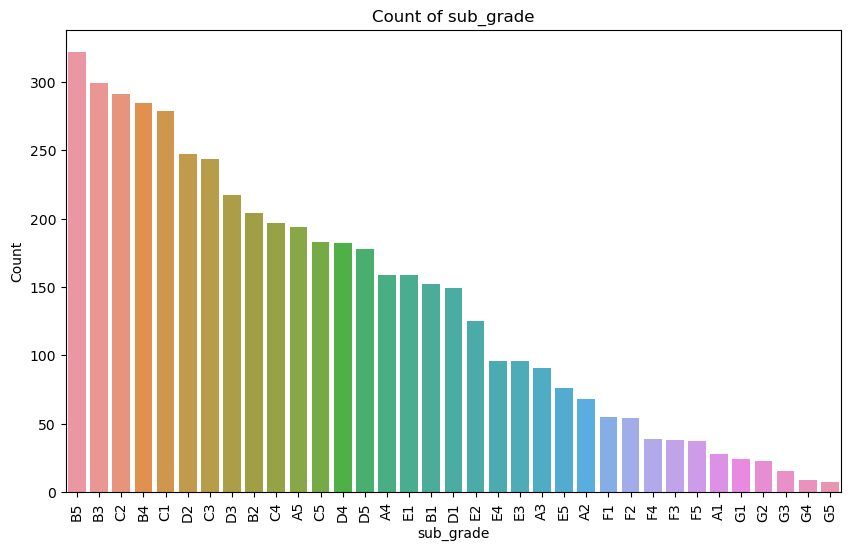

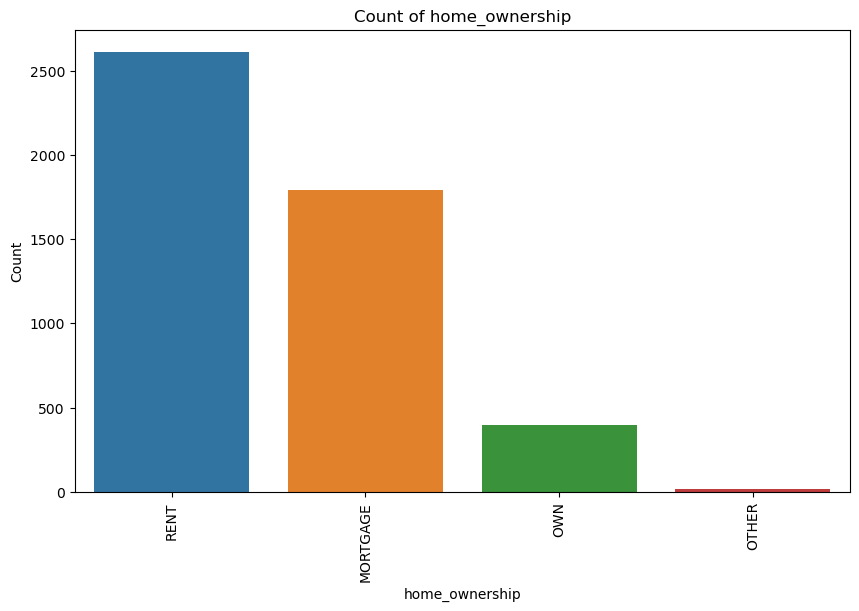

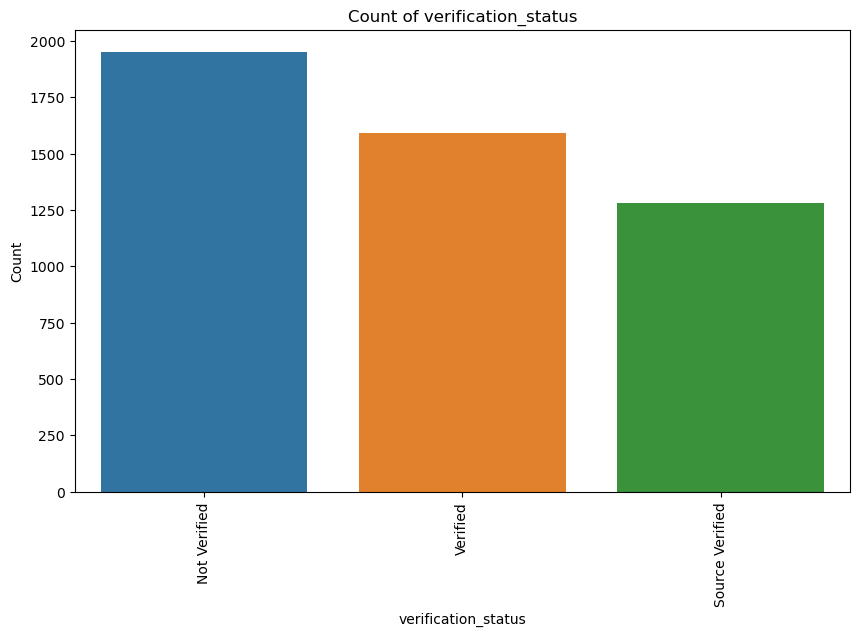

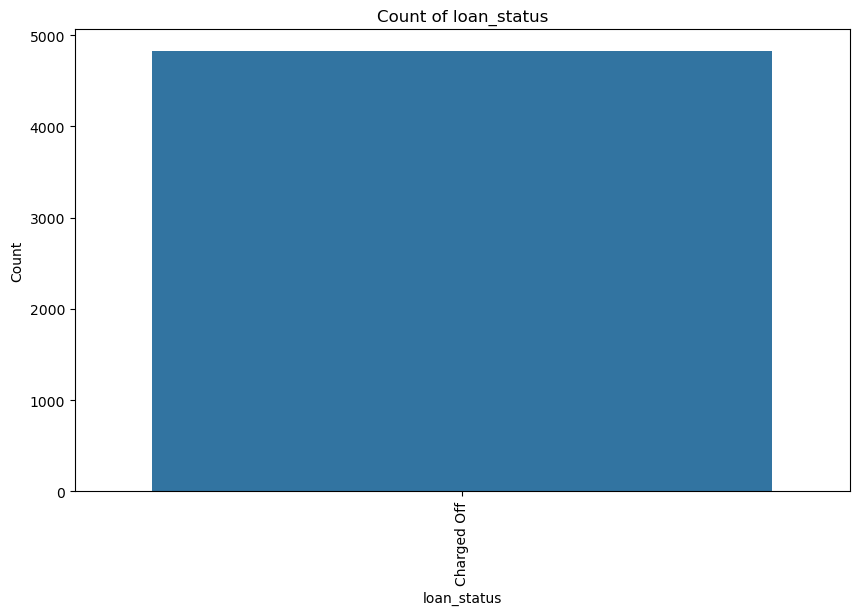

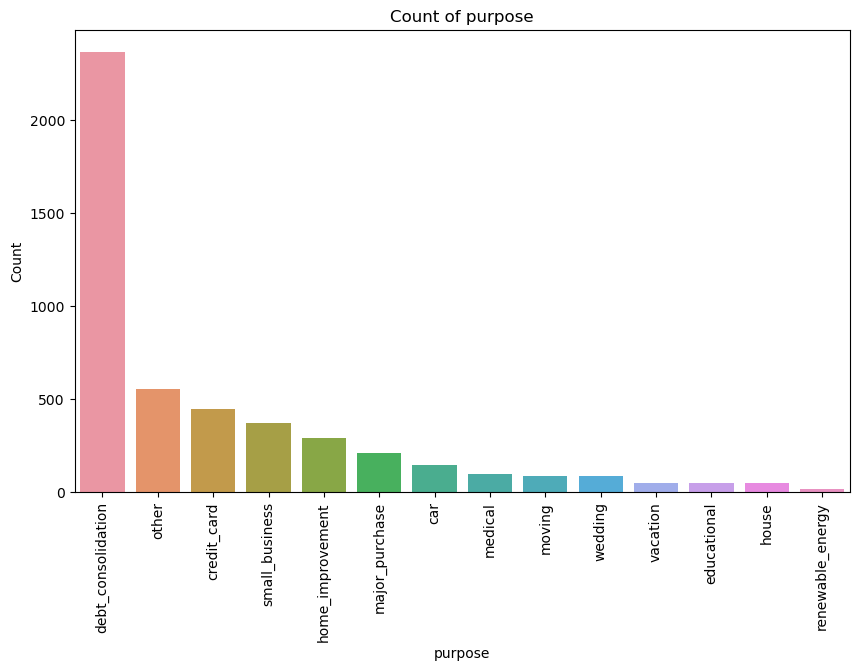

In [70]:

# Numerical Columns
numerical_columns = [
    'loan_amnt', 'funded_amnt', 'int_rate_numeric', 'installment', 'annual_inc', 
    'dti', 'revol_bal', 'revol_util_numeric', 'total_pymnt', 'total_rec_prncp', 'total_rec_int'
]

# Categorical Columns
categorical_columns = [
    'grade', 'sub_grade', 'home_ownership', 'verification_status', 
    'loan_status', 'purpose'
]

# Univariate Analysis for Numerical Columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_defaulters[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Univariate Analysis for Categorical Columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df_defaulters[column], order=df_defaulters[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

## Perform bivariate and multivariate analysis on columns

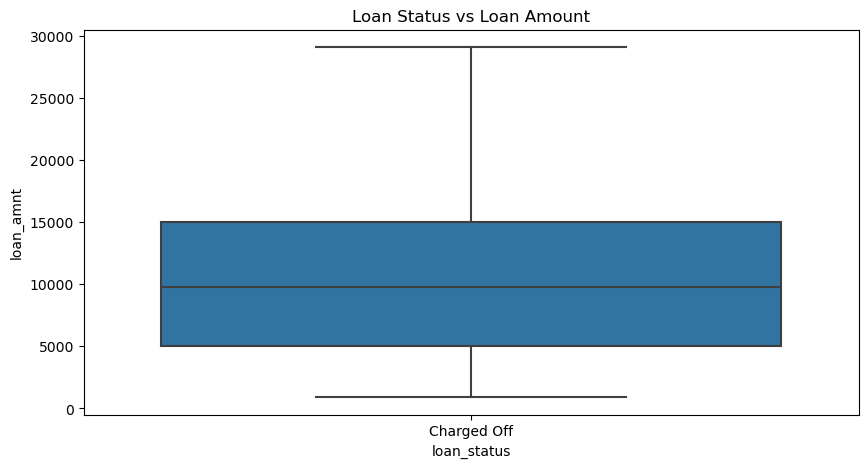

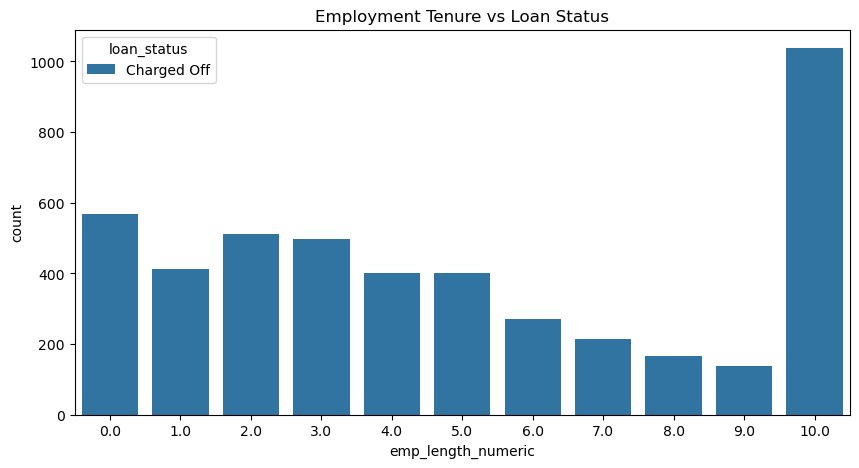

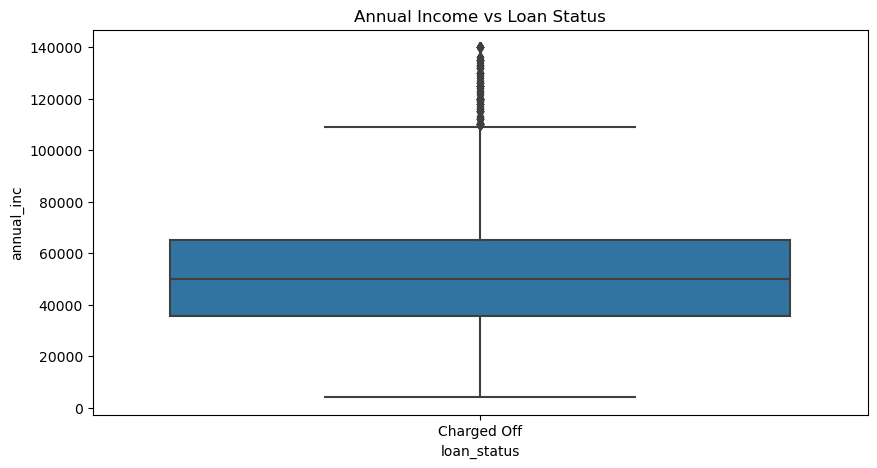

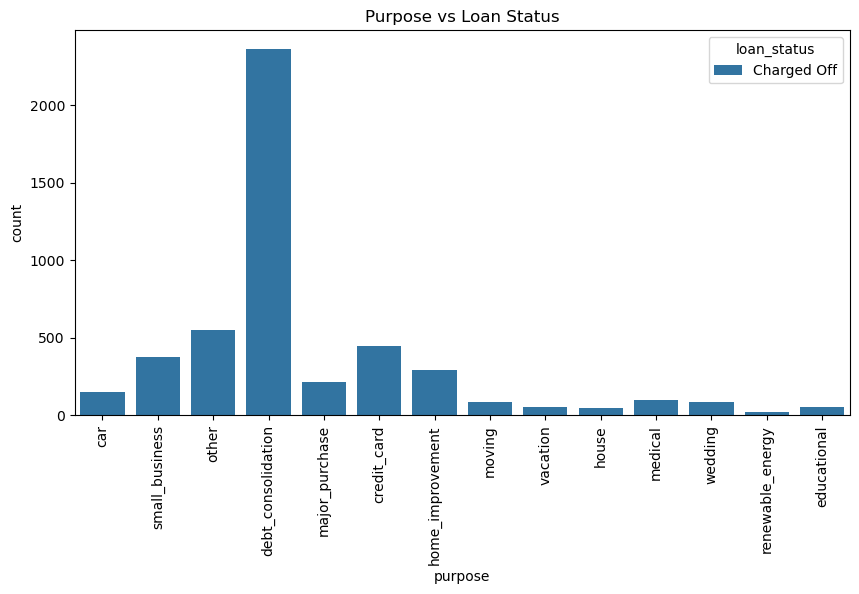

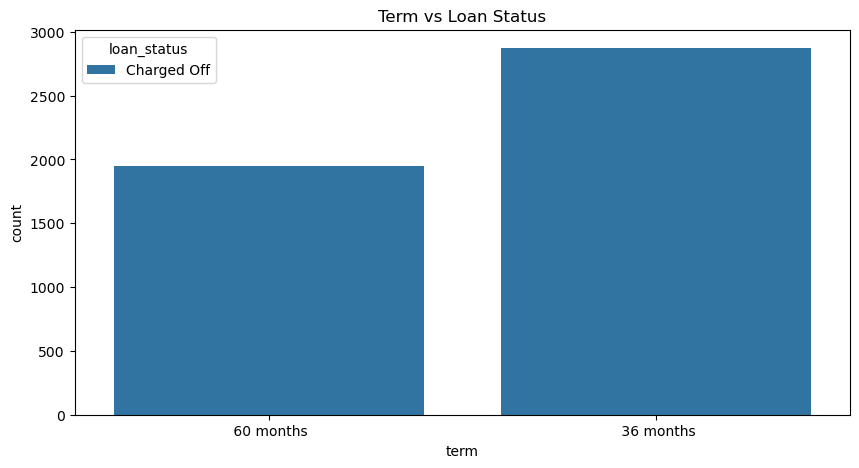

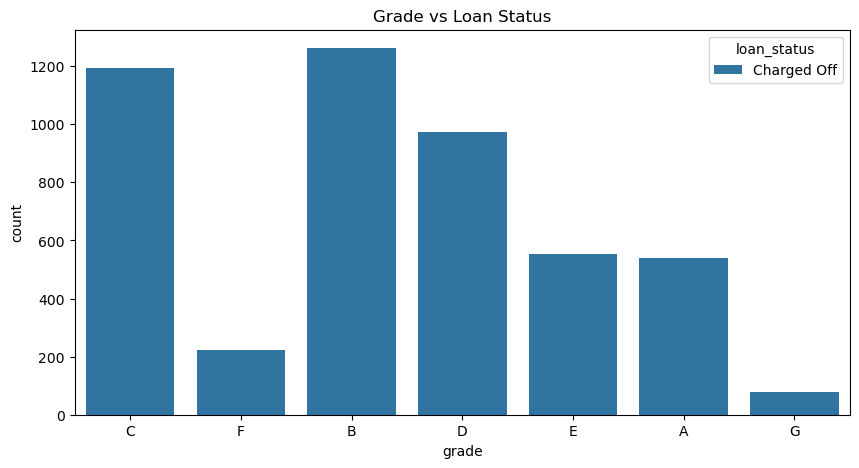

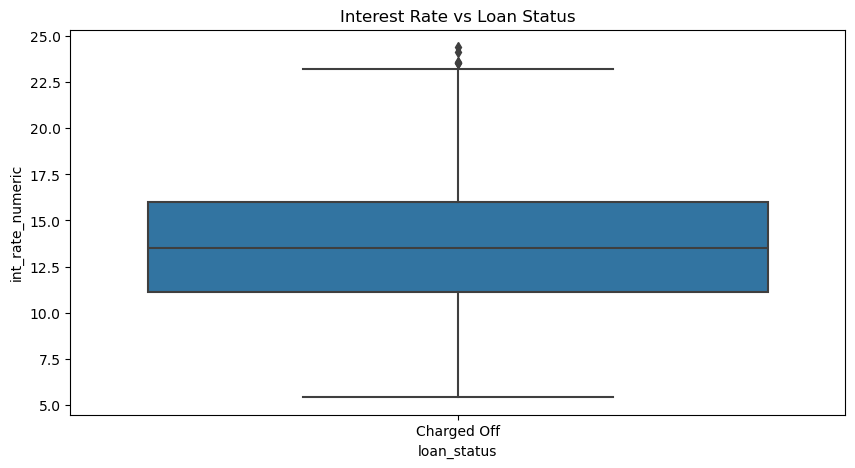

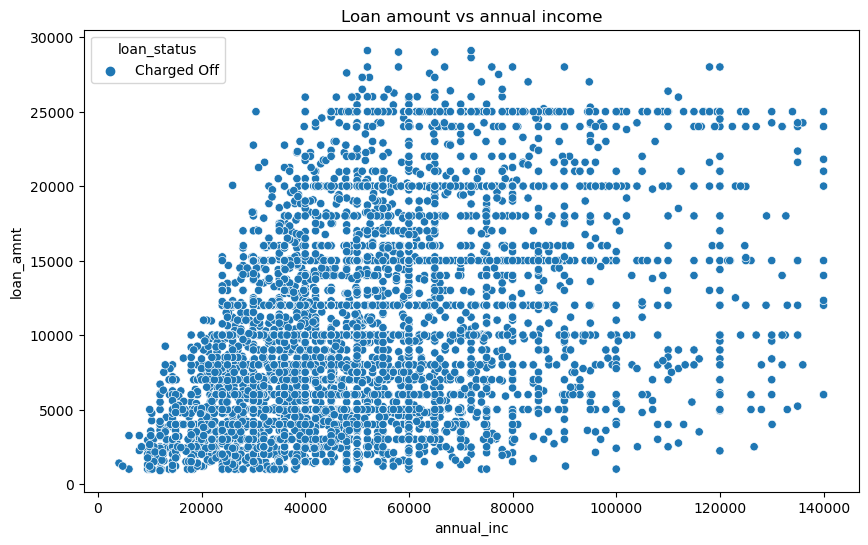

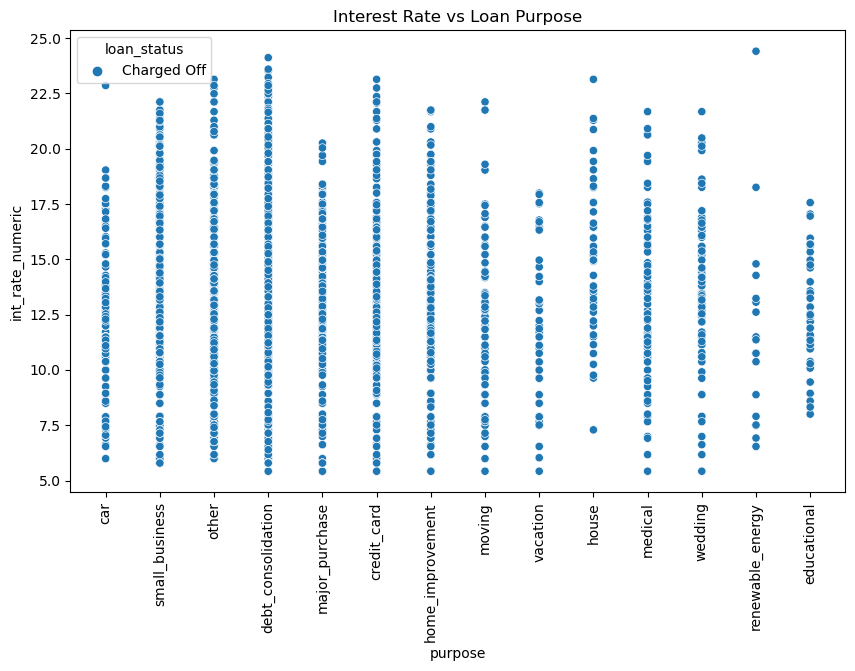

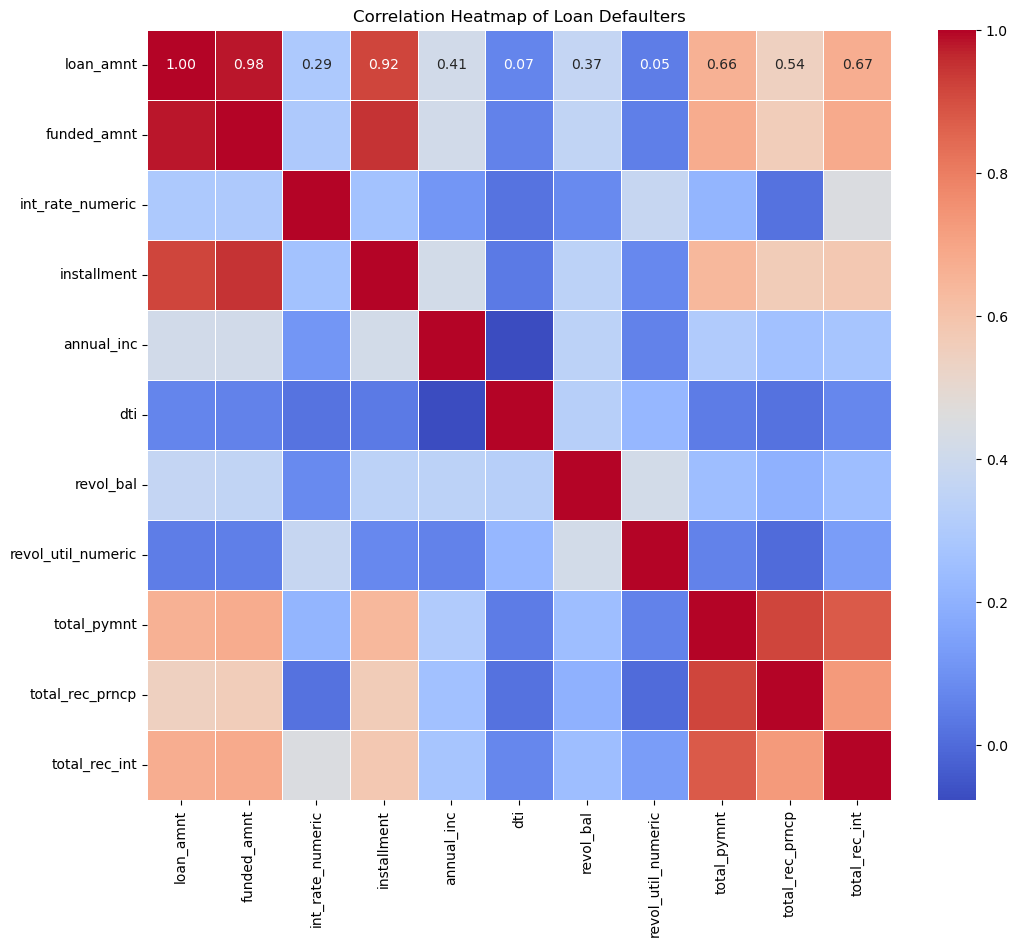

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


#plot graph for Loan status vs Loan Amount

plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status',y='loan_amnt',data=df_defaulters)
plt.title('Loan Status vs Loan Amount')
plt.show()

#employment Tensure vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length_numeric',hue='loan_status',data=df_defaulters)
plt.title('Employment Tenure vs Loan Status')
plt.show()

#Home Ownership vs Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status',y='annual_inc',data=df_defaulters)
plt.title('Annual Income vs Loan Status')
plt.show()

#Purpose vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='purpose',hue='loan_status',data=df_defaulters)
plt.title('Purpose vs Loan Status')
plt.xticks(rotation=90)
plt.show()

#Terms in months vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='term',hue='loan_status',data=df_defaulters)
plt.title('Term vs Loan Status')
plt.show()

#Grade vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='grade',hue='loan_status',data=df_defaulters)
plt.title('Grade vs Loan Status')
plt.show()


# convert int_rate to numeric
#df['int_rate_updated']=df['int_rate'].str.rstrip('%').astype('float')

#Interst Rate vs Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(x='loan_status',y='int_rate_numeric',data=df_defaulters)
plt.title('Interest Rate vs Loan Status')
plt.show()

# Loan amount vs Annual income , color coded by Loan Status
plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_inc',y='loan_amnt',hue='loan_status',data=df_defaulters)
plt.title('Loan amount vs annual income')
plt.show()

# Interest Rate vs Loan Purpose , grouped by Loan Status
plt.figure(figsize=(10,6))
sns.scatterplot(x='purpose',y='int_rate_numeric',hue='loan_status',data=df_defaulters)
plt.title('Interest Rate vs Loan Purpose')
plt.xticks(rotation=90)
plt.show()

import matplotlib.pyplot as plt

#df['int_rate']=df['int_rate'].str.replace('%','').astype(float)

df_defaulters['revol_util_numeric']= df_defaulters['revol_util'].str.rstrip('%').astype(float)
columns_for_heatmap = [
    'loan_amnt', 'funded_amnt', 'int_rate_numeric', 'installment', 'annual_inc', 
    'dti', 'revol_bal', 'revol_util_numeric', 'total_pymnt', 'total_rec_prncp', 'total_rec_int'
]

# Compute the correlation matrix
correlation_matrix = df_defaulters[columns_for_heatmap].corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Loan Defaulters')
plt.show()
#select only numeric columns for correlation matrix


              count          mean          std     min      25%      50%  \
loan_status                                                                
Charged Off  4822.0  52890.573299  24508.61532  4080.0  35579.0  49990.5   

                 75%       max  
loan_status                     
Charged Off  65004.0  140000.0  


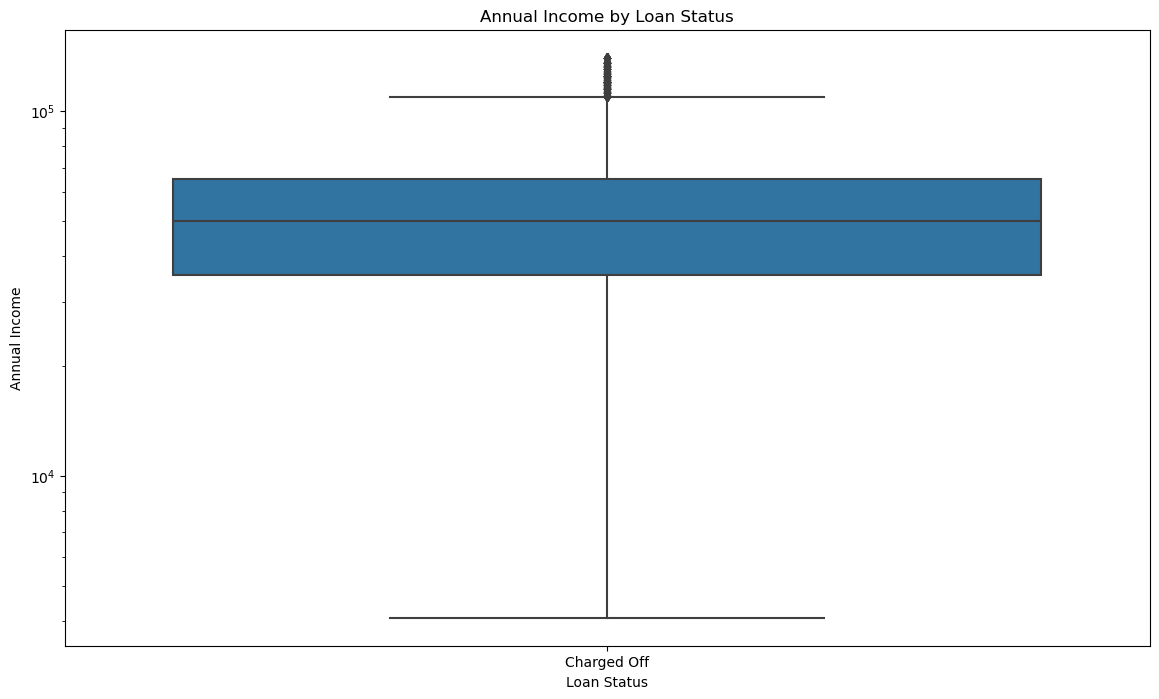

count      4774.000000
mean      52073.116705
std       23225.440590
min        4080.000000
25%       35253.000000
50%       49000.000000
75%       65000.000000
max      127000.000000
Name: annual_inc, dtype: float64


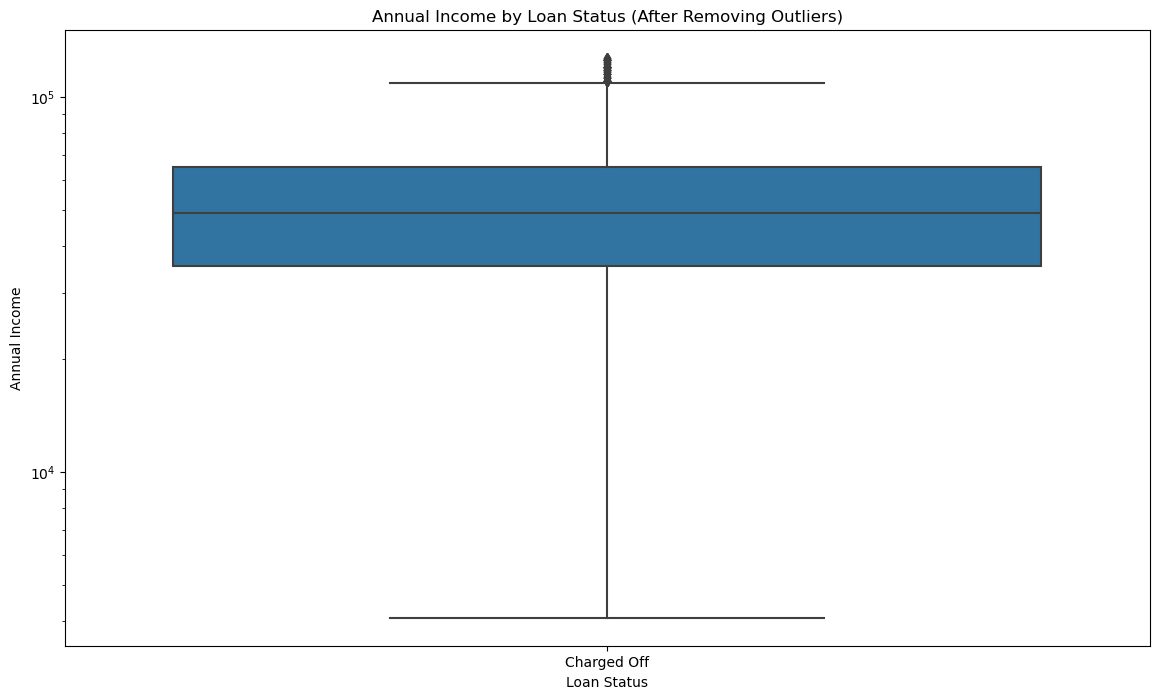

In [51]:
# Step 1: Summary Statistics
summary_stats = df_defaulters.groupby('loan_status')['annual_inc'].describe()
print(summary_stats)

# Step 2: Visualization
plt.figure(figsize=(14, 8))
sns.boxplot(x='loan_status', y='annual_inc', data=df_defaulters)
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.yscale('log')  # Log scale to handle wide range of income values
plt.show()

# Step 3: Filter Outliers
percentile_99 = df_defaulters['annual_inc'].quantile(0.99)
df_filtered = df_defaulters[df_defaulters['annual_inc'] <= percentile_99]

# Verify the filtering
print(df_filtered['annual_inc'].describe())

# Step 4: Re-Visualize After Removing Outliers
plt.figure(figsize=(14, 8))
sns.boxplot(x='loan_status', y='annual_inc', data=df_filtered)
plt.title('Annual Income by Loan Status (After Removing Outliers)')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.yscale('log')
plt.show()

In [64]:
#df_defaulters['int_rate_numeric'] = df_defaulters['int_rate'].str.rstrip('%').astype(float)

df_defaulters['revol_util_numeric']= df_defaulters['revol_util'].str.rstrip('%').astype(float)
